In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import integrate

In [30]:
#Defining our linear and nonlinear systems
#Note they differ only by the taylor expansion of sin(x)
def nonlinear_system(x, tau, alpha, beta):
    dthetadt = x[1]
    dOmegadt = -(alpha + beta * np.cos(tau))*np.sin(x[0])
    
    return [dthetadt, dOmegadt]

def linear_system(x, tau, alpha, beta):
    dthetadt = x[1]
    dOmegadt = -(alpha + beta * np.cos(tau))*x[0]
    
    return [dthetadt, dOmegadt]

#Defining functions for length and energy
# These are just for plotting purposes
def ell(theta, eps, tau):
    return 1 + eps * np.cos(tau)

def energy(theta, Omega, alpha, tau):
    return 0.5*Omega**2 - alpha*np.cos(theta)

In [31]:
#setting parameters
alpha = 0.25
beta = 0.1

#Setting initial conditions
#These are random numbers
theta0 = np.pi/10
Omega0 = 1
x0 = [theta0, Omega0]

#Setting the time
tau = np.linspace(0, 10, 1000)

lin_solution = integrate.odeint(linear_system, x0, tau, args=(alpha, beta))
nonlin_solution = integrate.odeint(nonlinear_system, x0, tau, args=(alpha, beta))

ltheta = np.take(lin_solution, 0, axis=1)
lOmega = np.take(lin_solution, 1, axis=1)

nltheta = np.take(nonlin_solution, 0, axis=1)
nlOmega = np.take(nonlin_solution, 1, axis=1)

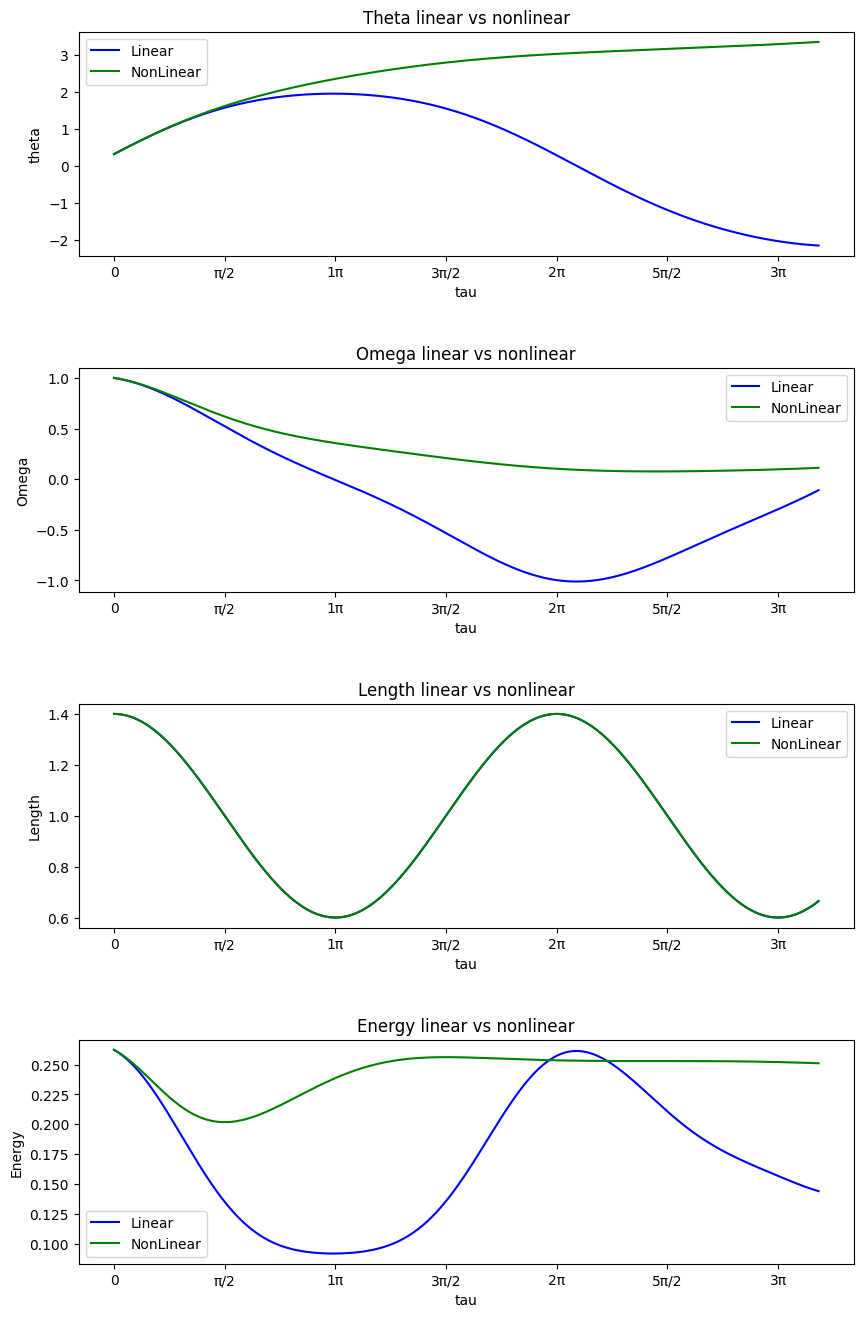

In [32]:
#Setting the xticks as increments of pi/2
tau_ticks = np.arange(0, 10, np.pi/2)
tau_ticks_label = [f'0' if n == 0 else f'π/2' if n == 1 else f'{int(n/2)}π' if n%2 == 0 else f'{int(n)}π/2' for n in tau_ticks / (np.pi / 2)] 

#Plotting Thetas
plt.figure(figsize=(10, 16))
plt.subplots_adjust(hspace=0.5)

plt.subplot(4, 1, 1)
plt.plot(tau, ltheta, label= "Linear", color = 'b')
plt.plot(tau, nltheta, label= "NonLinear", color= 'g')
plt.xticks(tau_ticks, tau_ticks_label)
plt.xlabel("tau")
plt.ylabel("theta")
plt.title("Theta linear vs nonlinear")
plt.legend()

#Plotting Omegas
plt.subplot(4, 1, 2)
plt.plot(tau, lOmega, label= "Linear", color= 'b')
plt.plot(tau, nlOmega, label= "NonLinear", color= 'g')
plt.xticks(tau_ticks, tau_ticks_label)
plt.xlabel("tau")
plt.ylabel("Omega")
plt.title("Omega linear vs nonlinear")
plt.legend()

#plotting Lengths
plt.subplot(4, 1, 3)
plt.plot(tau, ell(ltheta, beta/alpha, tau), label= "Linear", color = 'b')
plt.plot(tau, ell(nltheta, beta/alpha, tau), label= "NonLinear", color= 'g')
plt.xticks(tau_ticks, tau_ticks_label)
plt.xlabel("tau")
plt.ylabel("Length")
plt.title("Length linear vs nonlinear")
plt.legend()

#Plotting Energies
plt.subplot(4, 1, 4)
plt.plot(tau, energy(ltheta, lOmega, alpha, tau), label= "Linear", color= 'b')
plt.plot(tau, energy(nltheta, nlOmega, alpha, tau), label= "NonLinear", color= 'g')
plt.xticks(tau_ticks, tau_ticks_label)
plt.xlabel("tau")
plt.ylabel("Energy")
plt.title("Energy linear vs nonlinear")
plt.legend()

plt.show()